# 3. 什么是时间序列
*历史数据预测未来*

## 目录
- 什么是时间序列？
- 时间序列主要有哪些模型?
- 时间序列中的平稳性是什么？
- 如何用ADF检验时间序列的平稳性？

## 什么是时间序列？
时间序列数据记录的是同一个个体的某种也做随着时间的推移不断发展的过程，比如股票、期货、外汇的日收盘价等。

## 时间序列主要有哪些模型?
1. AR
2. MA
3. ARIMA
4. GACRH
5. ARIMA_GARCH

## 时间序列中的平稳性是什么？
一切时间序列的模型都是基于平稳性，如果不是平稳的时间序列，很容易出现所谓的伪回归(spurious regression)。
举个例子，你可能会发现某地的累计降雨量和它的CPI存在正相关关系，你run了个regression，发现模型的R方还不错，这是否意味着你可以用累计降雨量去预测CPI呢？NO.之所以会这样，是因为这两个序列都会随时间而增长，也就是说存在一个固定的趋势，即不平稳。不过大部分的金融时间序列并不会有固定趋势（不然你就无脑买就好啦），但是还有一种随机趋势，而大部分的金融时间序列都是随机趋势，也就是常说的随机漫步。 
#### 何谓平稳性呢？ 
一个时间序列，如果均值没有系统的变化（无趋势）、方差没有系统变化，且严格消除了周期性变化，就称之是平稳的。 

平稳性分为强平稳与弱平稳：

- 强平稳

强平稳过程的条件是一段时间序列，你在当中随便取两段长度一样的时间序列出来，它们两个的联合分布得相同。这个要求有点过分，所以我们一般所指的平稳为弱平稳。 


- 弱平稳

弱平稳的条件为时间序列的均值与方差是常数函数，协方差只依赖于时间间隔。用公式表达就是

$$E(X_t)=\mu<\infty$$
$$E(X_t^2)=\gamma_0<\infty$$
$$Cov(X_t,X_{t+k})=\gamma_k \qquad    for \quad\forall \quad k $$

#### 模拟固定趋势，随机趋势和平稳序列的图
第一幅图是稳定的趋势，随着时间增长而上涨。

第二幅其实就是我们所说的随机游走，也就是当前的观测值等于上一期的值加上一个白噪声，从图中可见随机漫步忽上忽下没有稳定的趋势。

第三幅图则是俗称的白噪声，即独立同分布，且均值为0，方差为常数，无序列相关性的一个时间序列，是一个平稳的过程，可以看见其在均值0上下波动。

一般来说，如果序列呈现上面第三幅图的形状，我们可以假设其平稳，当然由图中直接推断比较不够准确。我们可以用统计检验来验证。

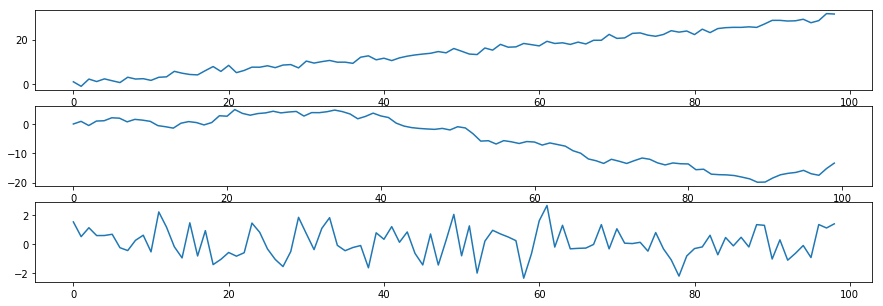

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(1,100,1)

y_ft=0.3*x+z

y_st=np.zeros(100)
for j in np.arange(99):
    y_st[j+1]=y_st[j]+z[j]
fig2 = plt.figure(figsize=(15,5))

z=np.random.normal(0,1,99)

ax1=fig2.add_subplot(311)
ax2=fig2.add_subplot(312)
ax3=fig2.add_subplot(313)
ax1.plot(y_ft)
ax2.plot(y_st)
ax3.plot(z)
plt.show()

## 如何用ADF检验时间序列的平稳性？
#### d阶单整
如果一个时间序列经过一次差分变成平稳的，则称原序列是1阶单整的，记为I(1)。 一般地，如果时间序列经过d次差分后变成平稳序列，而经过d-1次差分仍不平稳，则称原序列是d阶单整序列，记为I(d)。如果时间序列平稳，则记为I（0）。我们来演示一下000001股票差分的序列，并用ADF-test检验是否平稳。

close_p_value:0.286124266884
diff_p_value:0.006009307564
pct_p_value:0.00559202415792


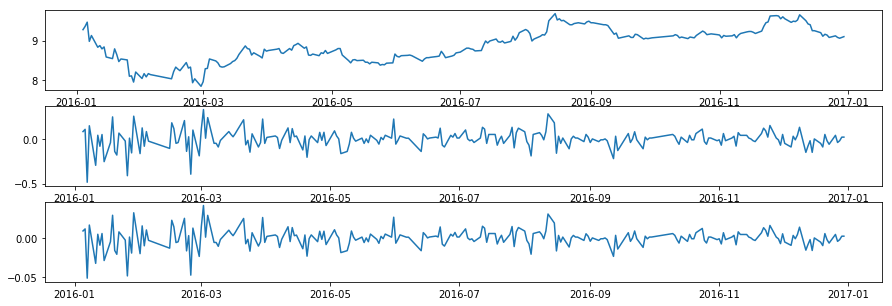

In [14]:
from statsmodels.tsa.stattools import adfuller
import tushare
import pandas as pd
import matplotlib.pyplot as plt

data=tushare.get_k_data('000001', start='2016-01-01', end='2016-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')
data=data['close']

close_p_value = adfuller(data)[1]
print('close_p_value:%s'  %close_p_value)

diff_p_value=adfuller(data.diff()[1:])[1]
print('diff_p_value:%s'   %diff_p_value)

pct_p_value=adfuller(data.pct_change()[1:])[1]
print('pct_p_value:%s'   %pct_p_value)

fig2 = plt.figure(figsize=(15,5))
ax1=fig2.add_subplot(311)
ax2=fig2.add_subplot(312)
ax3=fig2.add_subplot(313)
ax1.plot(data)
ax2.plot(data.diff())
ax3.plot(data.pct_change()[1:])

plt.show()

第一个p-value不显著而第二个p-value显著，也就是说未差分前序列不平稳，而差分后序列平稳。 
根据ADF-test的结果，可以得出该序列为I(1),所以一般我们会使用一次差分或收益率来进行时间序列的建模。

## 作业
对不同的股票序列进行差分与检验。